In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [274]:
train_data = pd.read_csv("data/train.csv")

train_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [275]:
train_data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print(f"% of women who survived: {rate_women:.2f}")

% of women who survived: 0.74


In [8]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print(f"% of men who survived: {rate_men:.2f}")

% of men who survived: 0.19


In [13]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


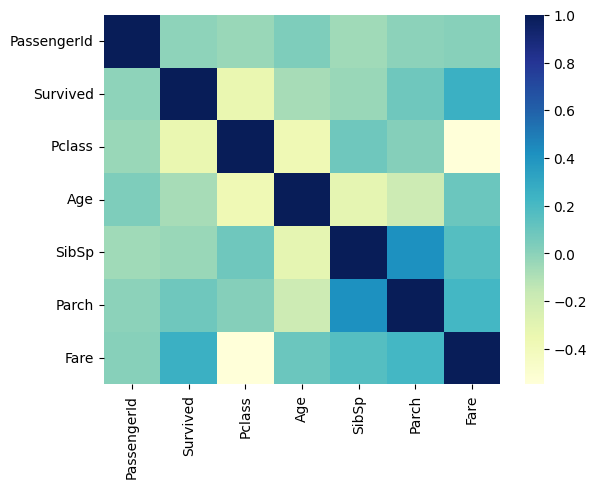

In [15]:
sns.heatmap(train_data.corr(numeric_only=True), cmap="YlGnBu")
plt.show()

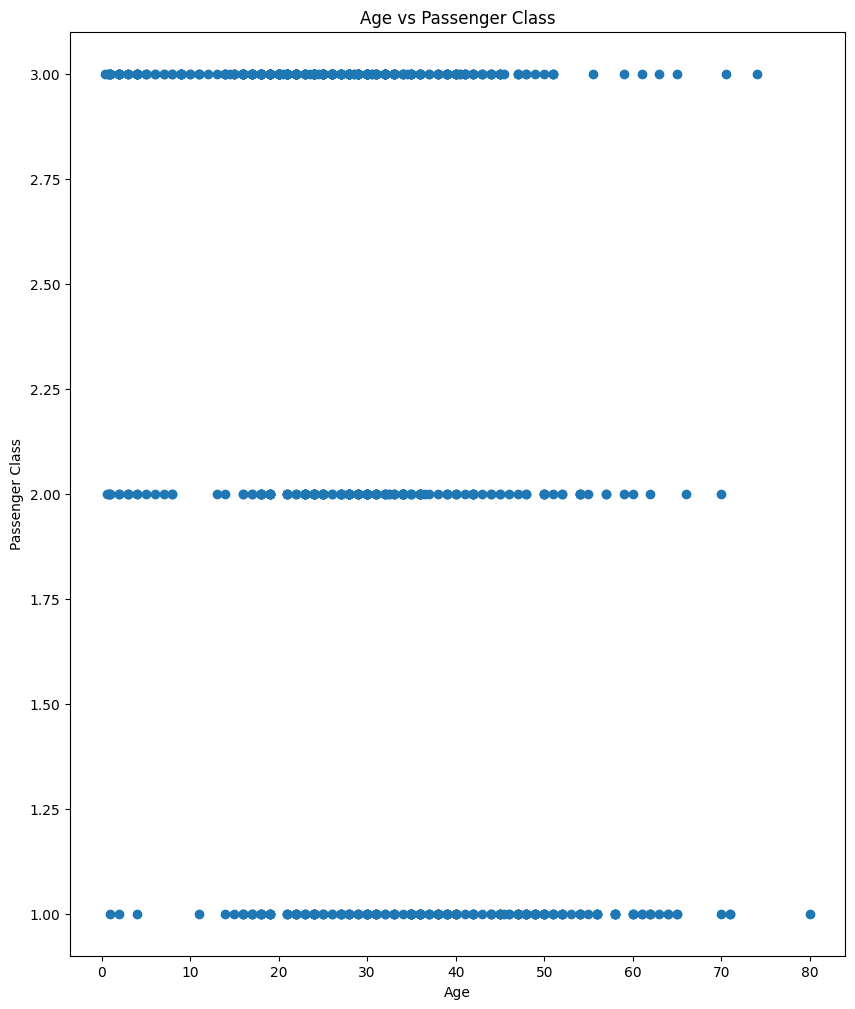

In [20]:
plt.figure(figsize=(10,12))
plt.scatter(train_data["Age"], train_data["Pclass"])
plt.xlabel("Age")
plt.ylabel("Passenger Class")
plt.title("Age vs Passenger Class")
plt.show()

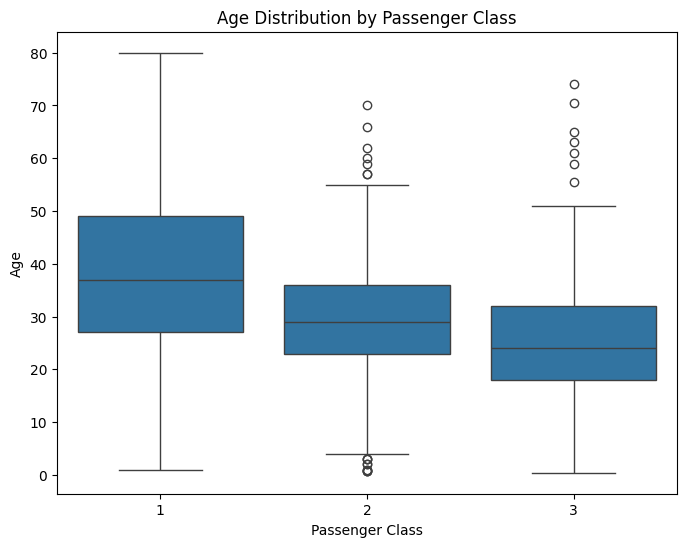

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_data["Pclass"], y=train_data["Age"])
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.title("Age Distribution by Passenger Class")
plt.show()

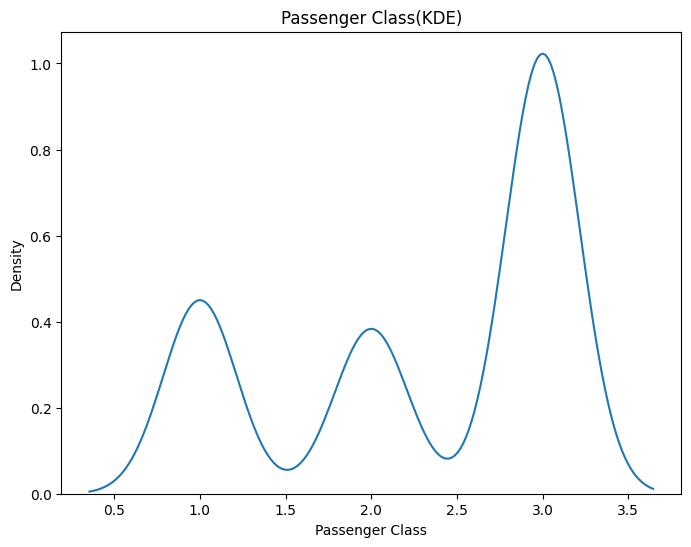

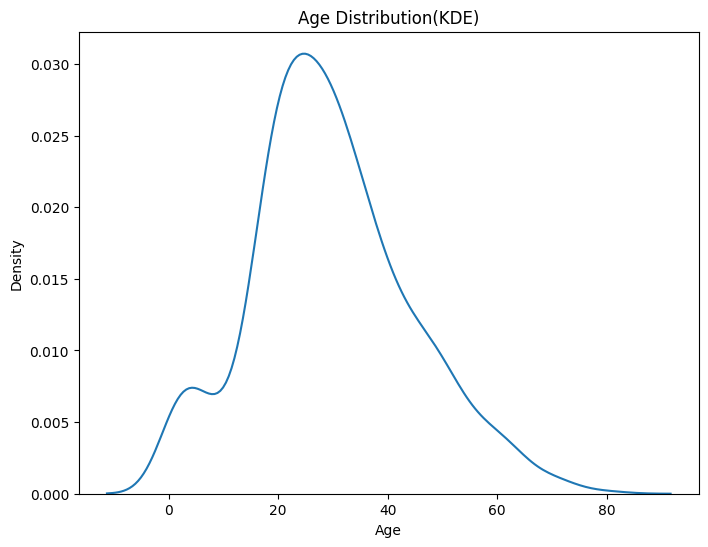

In [28]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=train_data["Pclass"])
plt.xlabel("Passenger Class")
plt.ylabel("Density")
plt.title("Passenger Class(KDE)")
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(x=train_data["Age"])
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution(KDE)")
plt.show()

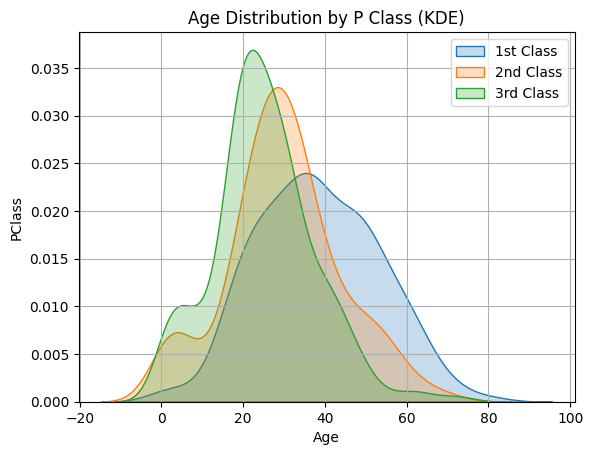

In [32]:
sns.kdeplot(train_data[train_data["Pclass"]==1]["Age"], fill=True, label="1st Class")
sns.kdeplot(train_data[train_data["Pclass"]==2]["Age"], fill=True, label="2nd Class")
sns.kdeplot(train_data[train_data["Pclass"]==3]["Age"], fill=True, label="3rd Class")

plt.xlabel("Age")
plt.ylabel("PClass")
plt.title("Age Distribution by P Class (KDE)")
plt.legend()
plt.grid(True)
plt.show()

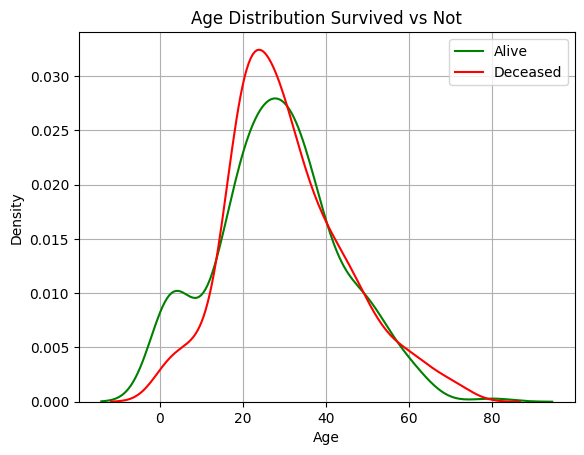

In [38]:
sns.kdeplot(train_data[train_data["Survived"]==1]["Age"], fill=False, label="Alive", color="green")
sns.kdeplot(train_data[train_data["Survived"]==0]["Age"], fill=False, label="Deceased", color="red")
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution Survived vs Not")
plt.legend()
plt.grid(True)
plt.show()

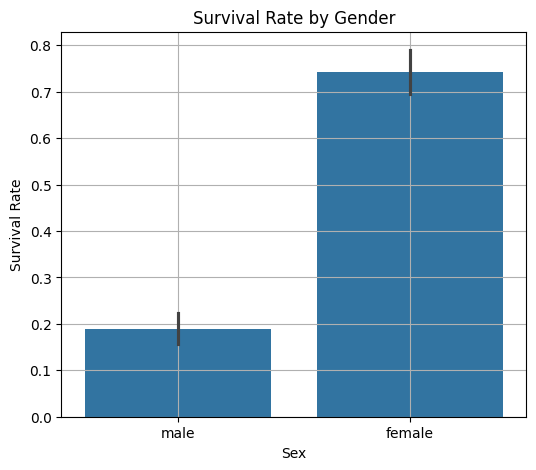

In [42]:
plt.figure(figsize=(6, 5))
sns.barplot(x="Sex", y="Survived", data=train_data)

plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender")
plt.grid(True)

plt.show()

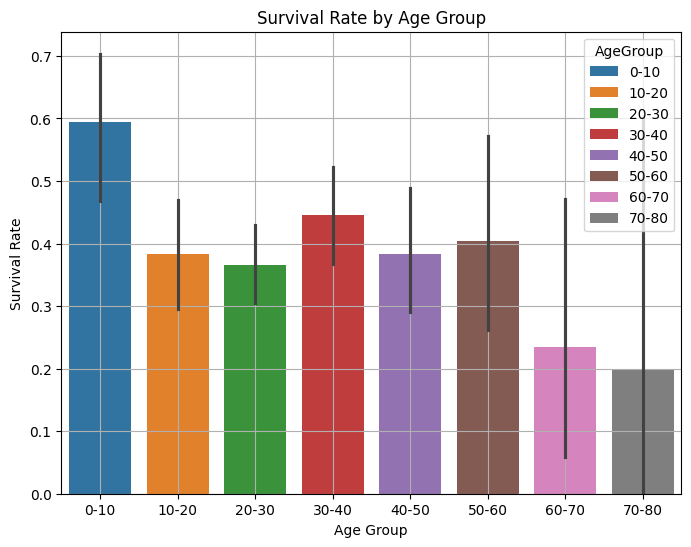

In [46]:
train_data["AgeGroup"] = pd.cut(train_data["Age"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80"])

plt.figure(figsize=(8, 6))
sns.barplot(x="AgeGroup", y="Survived", data=train_data, hue="AgeGroup")

plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Age Group")
plt.grid(True)

plt.show()

C:\Users\senya\AppData\Local\Temp\ipykernel_13548\2947349277.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=train_data, palette="viridis")


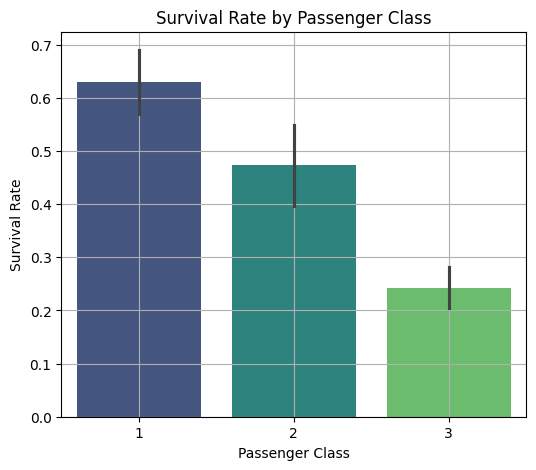

In [47]:
plt.figure(figsize=(6, 5))
sns.barplot(x="Pclass", y="Survived", data=train_data, palette="viridis")

plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.grid(True)

plt.show()

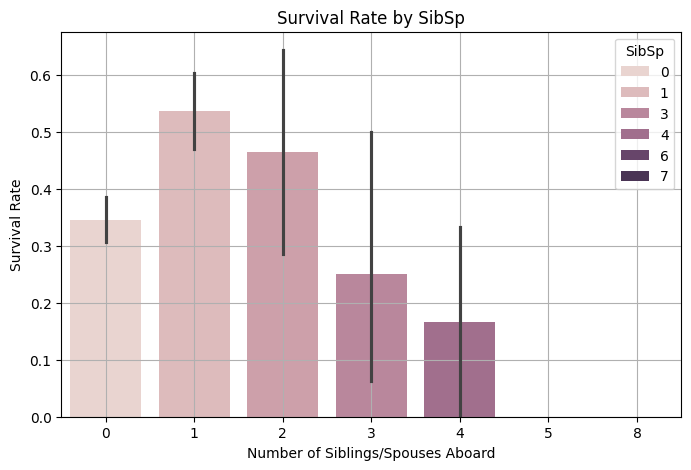

In [49]:
plt.figure(figsize=(8, 5))
sns.barplot(x="SibSp", y="Survived", data=train_data, hue="SibSp")

plt.xlabel("Number of Siblings/Spouses Aboard")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by SibSp")
plt.grid(True)

plt.show()

In [284]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,1


In [277]:
train_data.drop(columns=["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [279]:
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)

C:\Users\senya\AppData\Local\Temp\ipykernel_13548\3862673734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)


In [285]:
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [281]:
train_data["Sex"] = train_data["Sex"].map({"male":0, "female":1})
train_data = pd.get_dummies(train_data, columns=["Embarked"], drop_first=True)

In [282]:
train_data["Embarked_Q"] = train_data["Embarked_Q"].astype(int)
train_data["Embarked_S"] = train_data["Embarked_S"].astype(int)

In [283]:
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)

C:\Users\senya\AppData\Local\Temp\ipykernel_13548\3432818176.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_data["Age"].median(), inplace=True)


In [286]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_data[["Age", "Fare"]] = ss.fit_transform(train_data[["Age", "Fare"]])

In [293]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1  # +1 to include the passenger
train_data.drop(columns=["SibSp", "Parch"], inplace=True, axis=1)


In [294]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,0,-0.565736,-0.502445,0,1,2
1,2,1,1,1,0.663861,0.786845,0,0,2
2,3,1,3,1,-0.258337,-0.488854,0,1,1
3,4,1,1,1,0.433312,0.420730,0,1,2
4,5,0,3,0,0.433312,-0.486337,0,1,1


<Axes: >

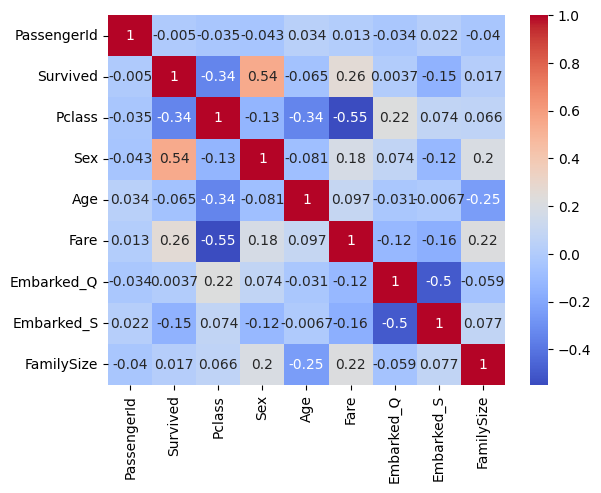

In [295]:
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

In [296]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

X = train_data.drop(columns=["Survived", "PassengerId"])
y = train_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

model = DecisionTreeClassifier(random_state=9, max_depth=9)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.80


In [297]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_test, y_pred)
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       100
           1       0.89      0.63      0.74        79

    accuracy                           0.80       179
   macro avg       0.83      0.79      0.79       179
weighted avg       0.82      0.80      0.80       179

Confusion Matrix:
 [[94  6]
 [29 50]]


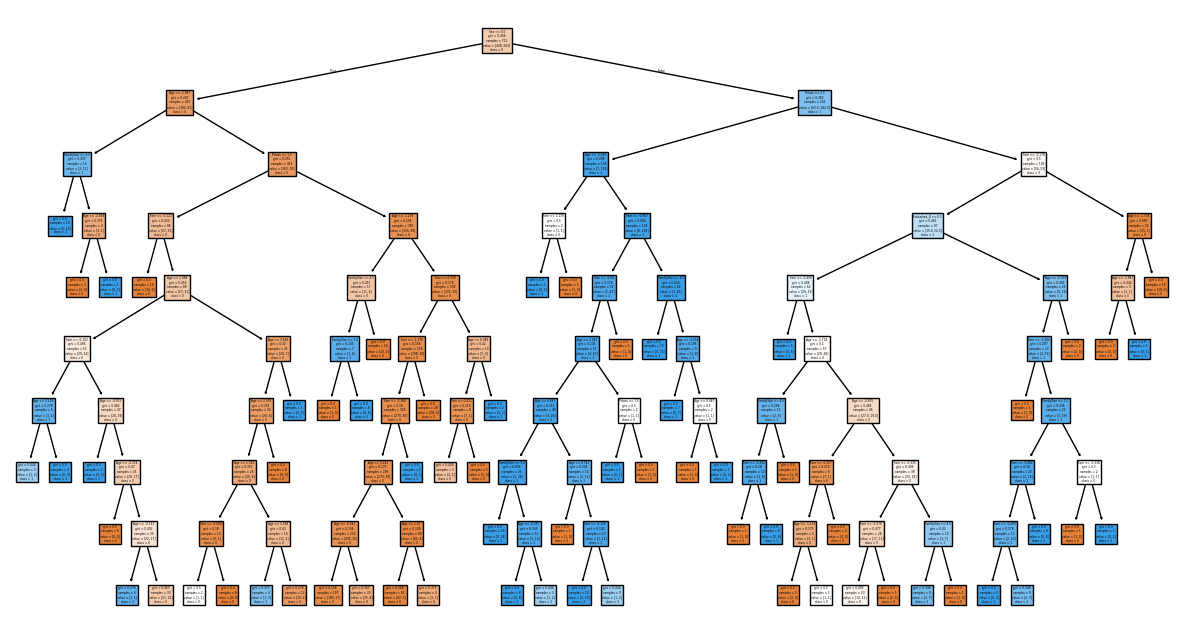

In [298]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=X_train.columns, class_names=["0", "1"], filled=True)
plt.show()

In [211]:
importance = pd.Series(model.feature_importances_, index=X_test.columns).sort_values(ascending=True)
print(importance)


Embarked_S    0.000000
Embarked_Q    0.007881
FamilySize    0.061602
Fare          0.142176
Pclass        0.142479
Age           0.201474
Sex           0.444387
dtype: float64


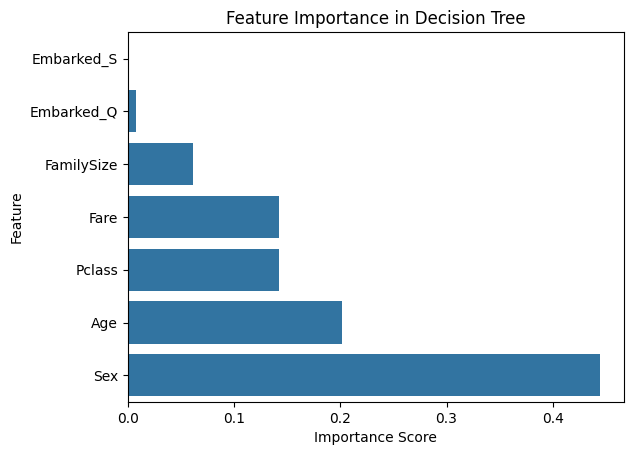

In [299]:
feature_importance = model.feature_importances_
features = np.array(X_train.columns)

sorted_idx = np.argsort(feature_importance)
sorted_imp = feature_importance[sorted_idx]
sorted_feat = features[sorted_idx]

sns.barplot(x=sorted_imp, y=sorted_feat)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree")
plt.show()

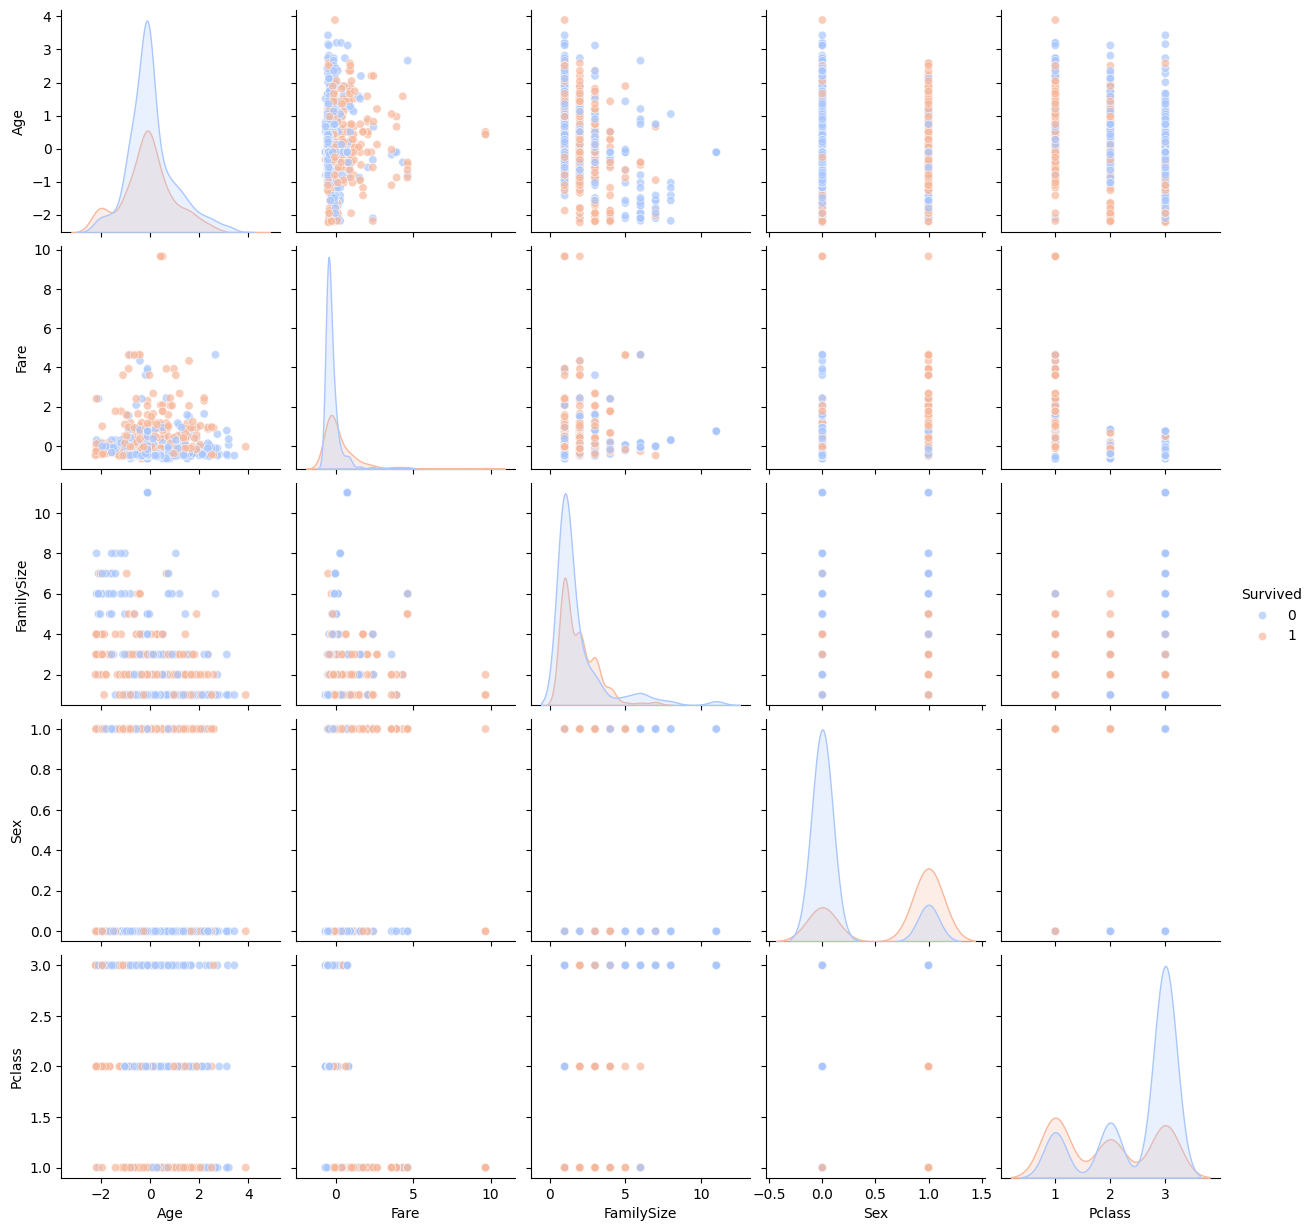

In [117]:
features1 = ['Age', 'Fare', 'FamilySize', 'Sex', 'Pclass']
pairwise_data = train_data[features1 + ['Survived']]
sns.pairplot(pairwise_data, hue="Survived", palette="coolwarm", plot_kws={'alpha': 0.7})
plt.show()

In [242]:
test_data = pd.read_csv("data/test.csv")
test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [243]:
test_data.drop(columns=["Name", "Cabin", "Ticket"], axis=1, inplace=True)

In [300]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,0,-0.565736,-0.502445,0,1,2
1,2,1,1,1,0.663861,0.786845,0,0,2
2,3,1,3,1,-0.258337,-0.488854,0,1,1
3,4,1,1,1,0.433312,0.420730,0,1,2
4,5,0,3,0,0.433312,-0.486337,0,1,1


In [301]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,FamilySize
0,892,3,0,0.386231,-0.497413,1,0,1
1,893,3,1,1.371370,-0.512278,0,1,2
2,894,2,0,2.553537,-0.464100,1,0,1
3,895,3,0,-0.204852,-0.482475,0,1,1
4,896,3,1,-0.598908,-0.417492,0,1,3


In [215]:
test_data["Sex"] = test_data["Sex"].map({"male":0, "female":1})
test_data = pd.get_dummies(test_data, columns=["Embarked"], drop_first=True)

In [260]:
print(test_data.isnull().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [248]:
test_data["Age"].fillna(test_data["Age"].median(), inplace=True)

C:\Users\senya\AppData\Local\Temp\ipykernel_13548\356834183.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["Age"].fillna(test_data["Age"].median(), inplace=True)


In [250]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

C:\Users\senya\AppData\Local\Temp\ipykernel_13548\2536658624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


In [253]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
test_data[["Age", "Fare"]] = ss.fit_transform(test_data[["Age", "Fare"]])

In [257]:
test_data = pd.get_dummies(test_data, columns=["Embarked"], drop_first=True)

In [259]:
test_data["Embarked_Q"] = test_data["Embarked_Q"].astype(int)
test_data["Embarked_S"] = test_data["Embarked_S"].astype(int)

In [264]:
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1  # +1 to include the passenger
test_data.drop(columns=["SibSp", "Parch"], inplace=True, axis=1)

In [268]:
test_data["Sex"] = test_data["Sex"].map({"male":0, "female":1})

In [302]:
test_data.shape

(418, 8)

In [304]:
X_test1 = test_data.drop(columns=['PassengerId'])

predictions = model.predict(X_test1)

output = test_data[['PassengerId']]
output['Survived'] = predictions

output.to_csv('predictions.csv', index=False)

C:\Users\senya\AppData\Local\Temp\ipykernel_13548\2074368529.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Survived'] = predictions


In [306]:
predicted = pd.read_csv("predictions.csv")
predicted.shape

(418, 2)